# Grover search

Qlasskit offer a class to easily perform a `Grover` search over a qlasskit oracle. 
First, we define a function named `and_all` that returns `True` iff all the element of an input list `a_list` are `True`. We want to use a Grover search to find the input value that led to a `True` result of the function.

In [1]:
from qlasskit import qlassf, Qlist


@qlassf
def and_all(a_list: Qlist[bool, 4]) -> bool:
    r = True
    for i in a_list:
        r = r and i
    return r

The qlasskit compiler will produce an optimized quantum circuit performing the given function.

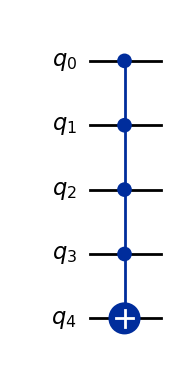

In [2]:
and_all.export("qiskit").draw("mpl")

We now can use our quantum function as an oracle for a Grover search. For instance, we want to find the input value that yeld to a `True` value of the function:

In [3]:
from qlasskit.algorithms import Grover

q_algo = Grover(and_all, True)

Qlasskit prepares the quantum circuit for the Grover search:

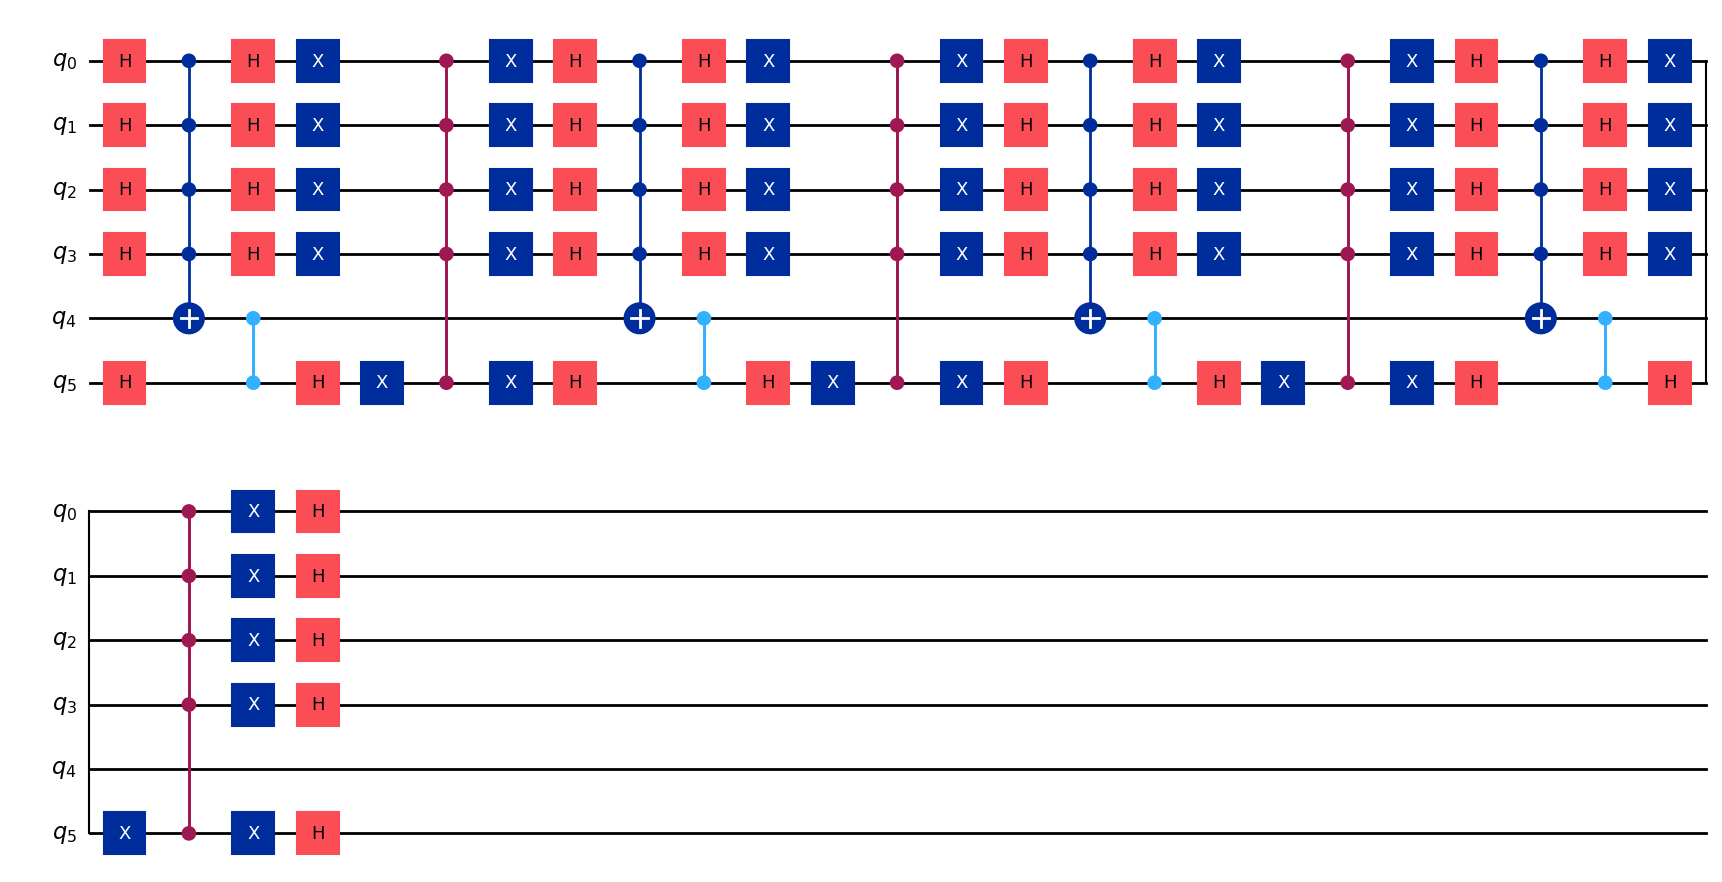

In [4]:
qc = q_algo.export("qiskit")
qc.draw("mpl")

Then we use our prefered framework and simulator for sampling the result; this is an example using `qiskit` with `aer_simulator`.

The `Grover` class, along with all circuit wrappers in qlasskit, provides utilities to encode inputs and decode outputs from a quantum circuit using the high level type definitions. In the output histogram, it's now evident that the input leading to a `True` result in the `and_all` function is a list where all elements are set to `True`, aligning with our expectations.


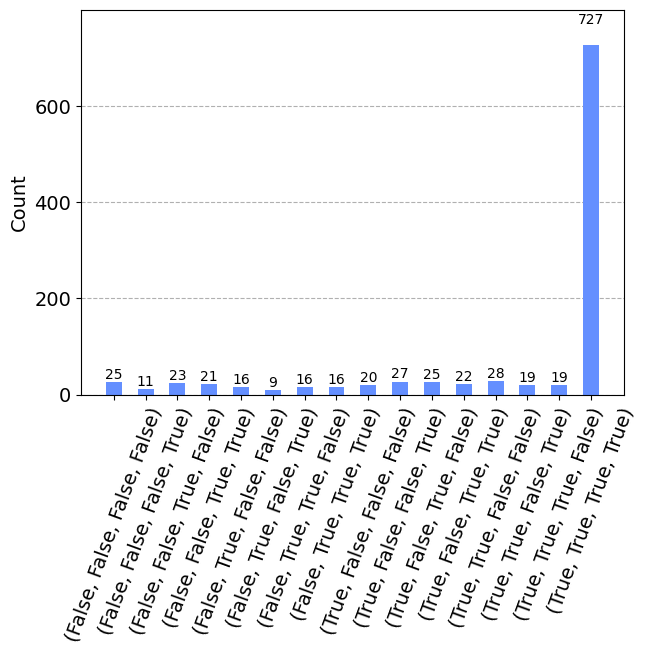

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc.measure_all()
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = q_algo.decode_counts(counts)
plot_histogram(counts_readable)